# Monet Classification

## Introduction

Currently the art market is estimated to be worth roughly $63.8 billion, from a high in 2014 of $68.2 billion [1](https://news.artnet.com/market/tefaf-2016-art-market-report-443615). With issues raised by both forgeries, some estimating to be up to over 50% of the global market[2](http://news.artnet.com/in-brief/over-50-percent-of-art-is-fake-130821), and found art can go for millions of dollars, even with controversy over its validity [3](https://www.theguardian.com/artanddesign/2016/apr/12/lost-caravaggio-causes-rift-in-art-world)  
Maintaining the validity of a work of art is increasingly difficult even for well trained appraisers. The introduction of a classification system that can be trained on known works of an artist against those of other artists to give at least partial input to the appraiser.

### Executive Summary
Through focusing on a single artist, in this case Monet, it is possible to develop a classification method for determining whether or not a painting was done by that specific artist. In the case of Monet the classification saw a 90% successful classification in the test data and an 85% classification in the hold out set.   
Through the use of Concurrent Neural Networks it is possible to generate an algorithm that is capable of being used in conjunction with a trained curator to positively identify the source of a painting. Although currently confined to Monet it is possible to extend this work to other artists, providing the collection of their work is large enough.

### Data Collection

The data used was collected from two sources. A selection of WikiArt images not by Monet and images from Claude Monet Gallery. The total number of paintings in both categories was 1000, with 500 by Monet and 500 not by Monet. From the 500 of each category 250 were put into a training folder and the others were placed into a test folder. The structure allowed for binary class assignment to the images as either being a Monet or not. 

All images were at least 250 × 250 and having RGB color channels. Images that were smaller than 250 pixels in either direction or in greyscale were removed from analysis. 


### Variable Selection 

Image data contains a large amount of data, and typical variable selection is not viable. The predicted variable was whether or not a presented image is a monet or not. Predictors exist as the content of the paintings themselves. Color spaces, edges, and texture being primary variables of interest. 


### Model Selection

A convolutional neural network was the model chosen for this task. Through analyzing overlapping segments of the image and passing it through several probability formulas.  
With a convolutional neural network there is also the benefit of local connectivity. This means that the probability of local neurons being activated determining the overall probability, rather than single neurons determining the overall probability of the class. This reduces the computational complexity substantially. 

### Data Pipeline

For the training data all of the images went through 20 transformations that included skewing, resizing, shifting, and flipping the image. These images were then fed to the neural network that would be used to generate the appropriate weights for the classification problem.

## Data Exploration and Visualization
The first image that was passed through this function was Monet's *La Gare Saint-Lazare*, which was painted in 1877. A relatively early painting by him, it shows his dedication to capturing the colors and motion that would come to define the impressionist movement. 
<div style="text-align:center"><img src="https://snag.gy/2Nm4XE.jpg"  height="344" width="375"></div>

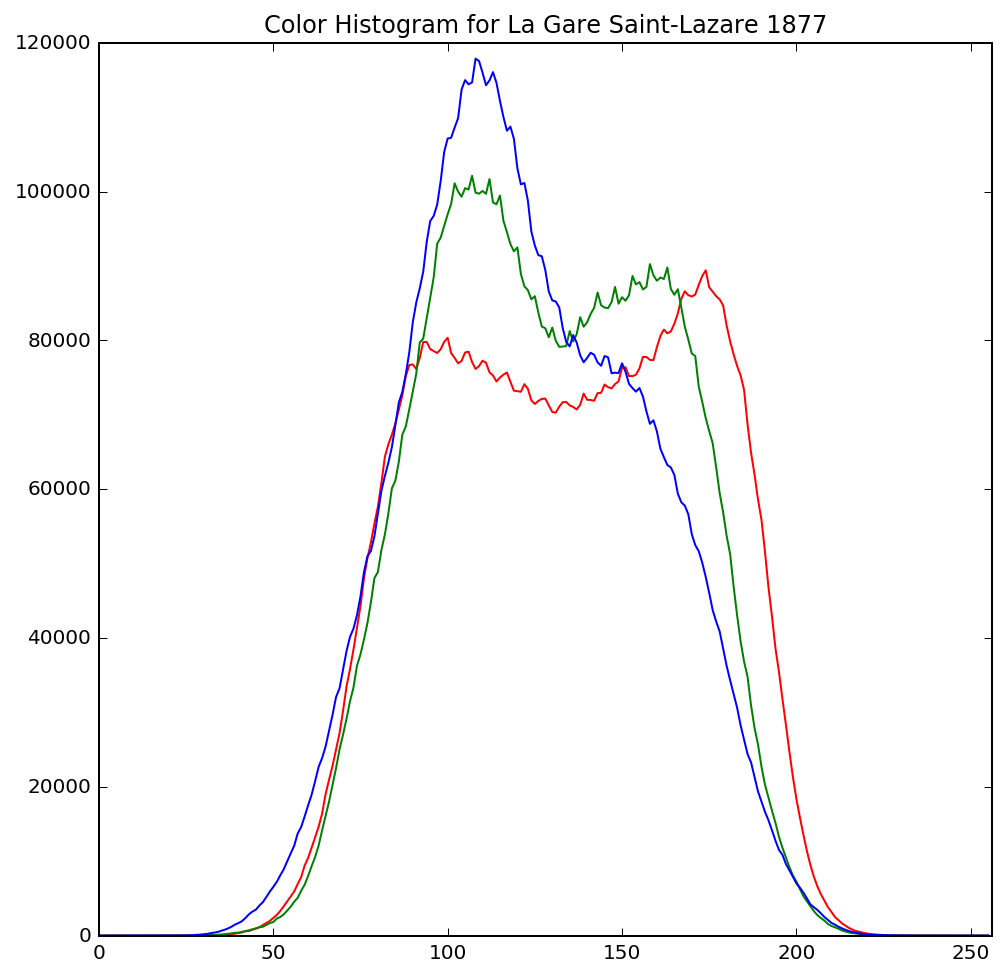

In [9]:
early = 'Photos/Early - La Gare Saint-Lazare 1877.jpg'
name = 'La Gare Saint-Lazare 1877'
rgb_hist(early, name)

The final image here is another image of Water Lilies. Monet had cataracts when he painted this interpretation. The colors are certainly much more muted, and red has a much greater weight than the other colors, which is very typical of patients suffering from cataracts. 
<div style="text-align:center"><img src="https://snag.gy/1onP3m.jpg"  height="344" width="375"></div>

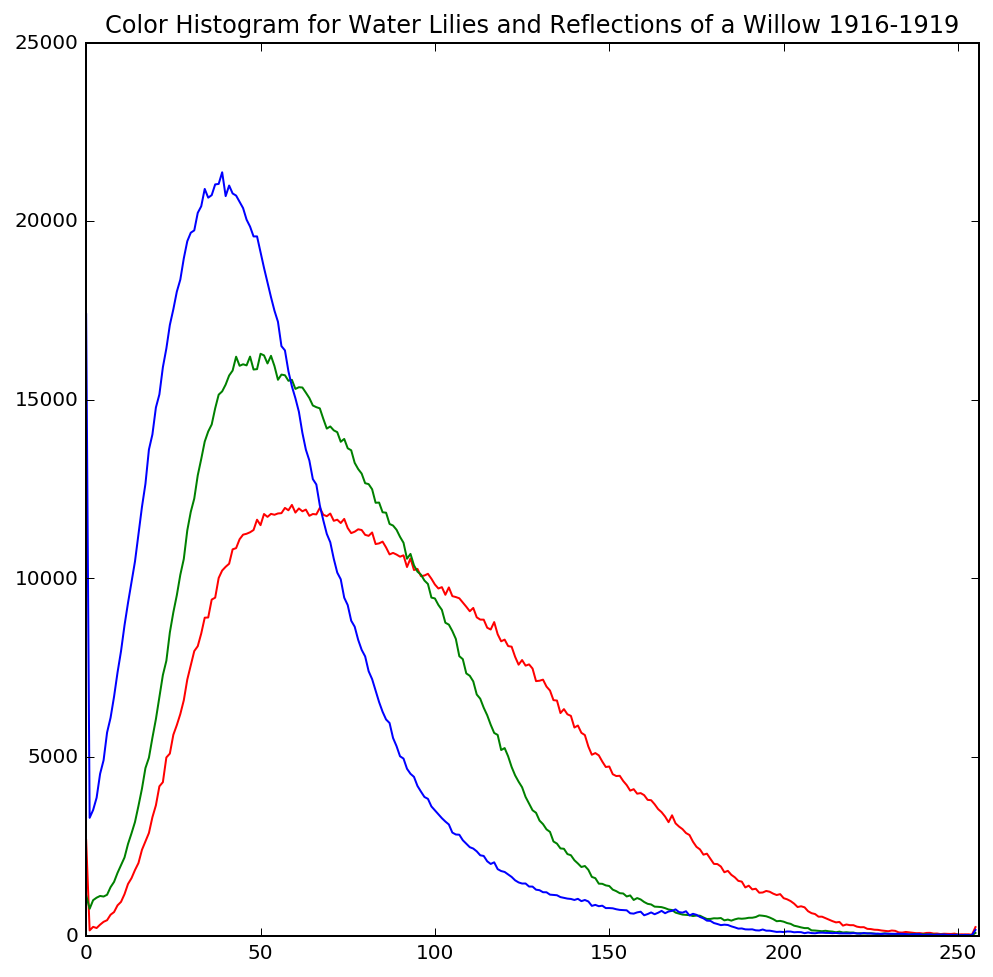

In [11]:
late = 'Photos/Late - Water Lilies and Reflections of a Willow 1916-1919.jpg'
name = 'Water Lilies and Reflections of a Willow 1916-1919'
rgb_hist(late, name)

### Interpretation of Findings

The neural network used in the course of this experiment was found to accurately determine whether or not a painting was done by Monet or not. With the success that is found through the classification of Monet it can certainly be applied to a variety of other artists and styles. Moving away from exclusively artist classification will reduce the probablility of false positives.

### Description of Key Code
Keras was used for this project with a Theano backend. This allowed for the use of a GPU to expedite the speed at which the neural network is able to process the images and their associated transformations. 

In [1]:
# Data Cleaning and Preparation

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from keras.callbacks import History


d_gen = ImageDataGenerator( 
                            rotation_range=0.15,    # All shears and shifts equal because all inputs have 1:1 aspect ratio
                            width_shift_range=0.15, 
                            height_shift_range=0.15, 
                            shear_range=0.15, 
                            zoom_range=0.15, 
                            
            
                            fill_mode='nearest', # Missing pixels from transformations are filled by nearest pixel of manipulated image
                            horizontal_flip=True,
                            vertical_flip=True, 
                            rescale=1./225, 
                          )

Using Theano backend.


In [4]:
t = 0
for batch in d_gen.flow(monet_array, batch_size=1,
                        save_to_dir='mod', save_prefix='monet', 
                        save_format='jpeg'):
    t += 1
    if t > 20: # Create 20 manipulated images
        break 

As an example this image

<div style="text-align:center"><img src="https://snag.gy/EFj8z3.jpg" height="344" width="375"></div>

Undergoes these following twenty transformations. 


<div style="text-align:center"><img src="https://media.giphy.com/media/goUlPPsMzrGXS/giphy.gif" height="344" width="375"></div>

# Creation of the Model

*Originally the model used was a three step neural network, but it was expanded up to four. This was becasue the initial data used in exploration did not have great fidelity. When the resolution of the input photos was increased, the reliability of the model was suitable for the introduction of another layer in order for more detailed classification.*

In [5]:
model = Sequential()

# Four Layers. Expanded from three due to increased accuracy

model.add(Convolution2D(32,3,3, input_shape=(3,200,200)))
model.add(Activation('relu'))
model.add(Dropout(0.2))  
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Convolution2D(64,2,2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(128,2,2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(256,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

WARNING (theano.gof.cmodule): ModuleCache.refresh() Found key without dll in cache, deleting it. /private/tmp/sebozek/theano.NOBACKUP/compiledir_Darwin-15.5.0-x86_64-i386-64bit-i386-2.7.11-64/tmpXHS3IY/key.pkl
WARNING (theano.gof.cmodule): ModuleCache.refresh() Found key without dll in cache, deleting it. /private/tmp/sebozek/theano.NOBACKUP/compiledir_Darwin-15.5.0-x86_64-i386-64bit-i386-2.7.11-64/tmpffQkAc/key.pkl


In [7]:
model.add(Flatten())

# Have two dropouts in order to reduce overfitting. 
# Initial threshold followed by two sigmoids for confirmation.

model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))                 
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))                 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
# use the above datagen for training
d_gen = ImageDataGenerator(rescale=1./255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True)

# For test only take in image at 200 by 200 pixels with no modification
test_d_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
# 250 epoch with 125 samples per epoch, 250 epochs. Close to convergence. 

history = model.fit_generator(monet_gen,            
                   samples_per_epoch=125,   
                   nb_epoch=250,            
                   validation_data = hold_out,  
                   nb_val_samples=250,         
                   verbose=1,
                   )

model.save_weights('monet_weights.h5', overwrite=True)

### Recommendations

With introduction of several other artists to confirm that the model is capable of classifying them it would be natural to move from a binary system to a multiclass classification problem. This would allow for easier identification of found works. 

### Future Validation

As increasing data is passed through the neural network it would be wise not only to make sure that the correct artist is being assigned to the image, but also that the correct style is being assigned to the painting. With the validation of both the artist, style, and time period, it will be very useful in proper classification. Could even be tailored to design complimentary museum exhibits. 

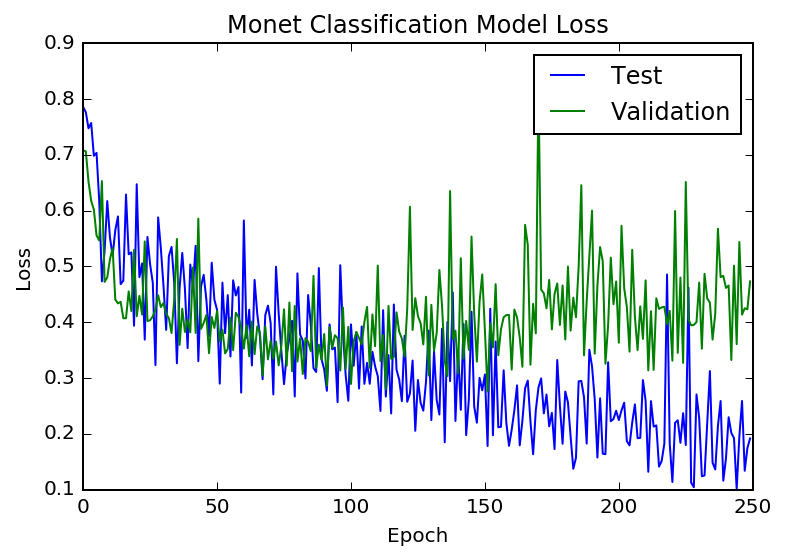

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Monet Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test', 'Validation'], loc='upper right')

plt.show()

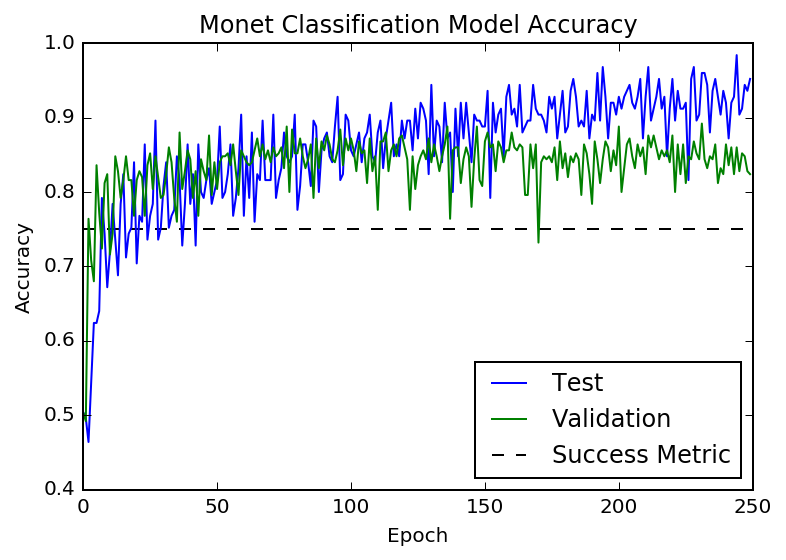

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.hlines(0.75,0,250, linestyles='dashed', label='Success Metric')
plt.plot(figsize=(15,15))
plt.title('Monet Classification Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation', 'Success Metric'], loc='lower right')

plt.show()

Due to the size of the dataset the output of both the accuracy and the loss were found to be very noisy. Both the loss and the accuracy were still found to be within the desired range. 

## Predicting Most and Least Likely Monets

In [21]:
predicted = model.predict_generator(monet_class_gen, 500)

The closest to being Monet from artwork that was not done by Monet was found to be Atkinson Grimshaw's *London Bridge Half Tide*  

<div style="text-align:center"><img src="https://snag.gy/jEKIdF.jpg" height="344" width="375"></div>

Grimshaw was a painter of the Victorian era, notable for his romantist style. He focused on keeping the style 'true to life' and spent considerable effort in maintaining an appropriate style to reflect his work. Below is a histogram of this painting.

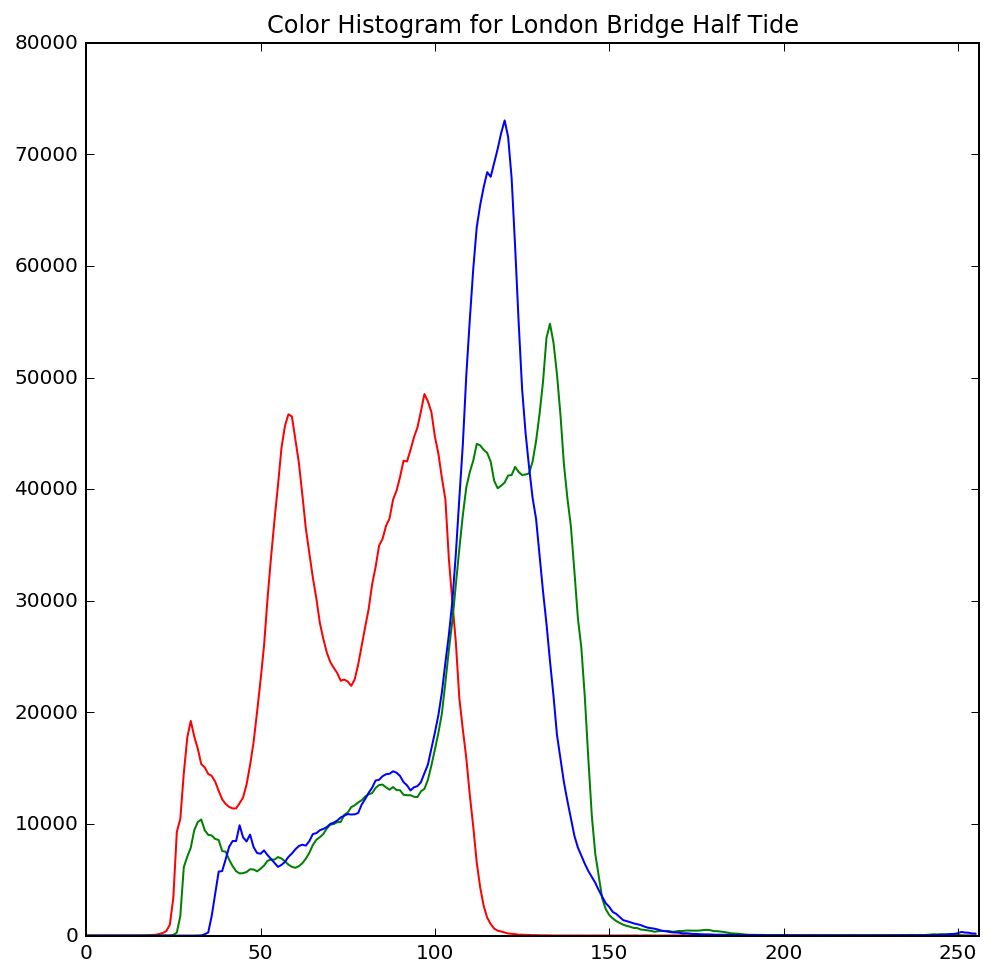

In [12]:
grimshaw = '/Users/sebozek/Desktop/Better_Data/Hold_Out/Not Monet/10225.jpg'
grimshaw_img = 'London Bridge Half Tide'
rgb_hist(grimshaw, grimshaw_img)

The furthest from Monet's work was Jan Sluyther's *Portrait of a Dancer*. It's post impressionist styles focused on duller, muted colors with small flourishes. The focus is not on a landscape or of a natural color scheme. The skin tone is nearly uniform, lines are focused more on definition by shading.
<div style="text-align:center"><img src="https://snag.gy/jk71Ur.jpg"  height="375" width="344"></div>
Jan Sluyther was a Dutch post-impressionist. In his words his style was 'struggling with color'. This is very different from Monet's use of color in his work, where he put much thought into the colors in the composition, occasionally at the cost of his subject matter, since the vast majority of his work is oriented on landscapes and natural scenes, with less of a focus on people.

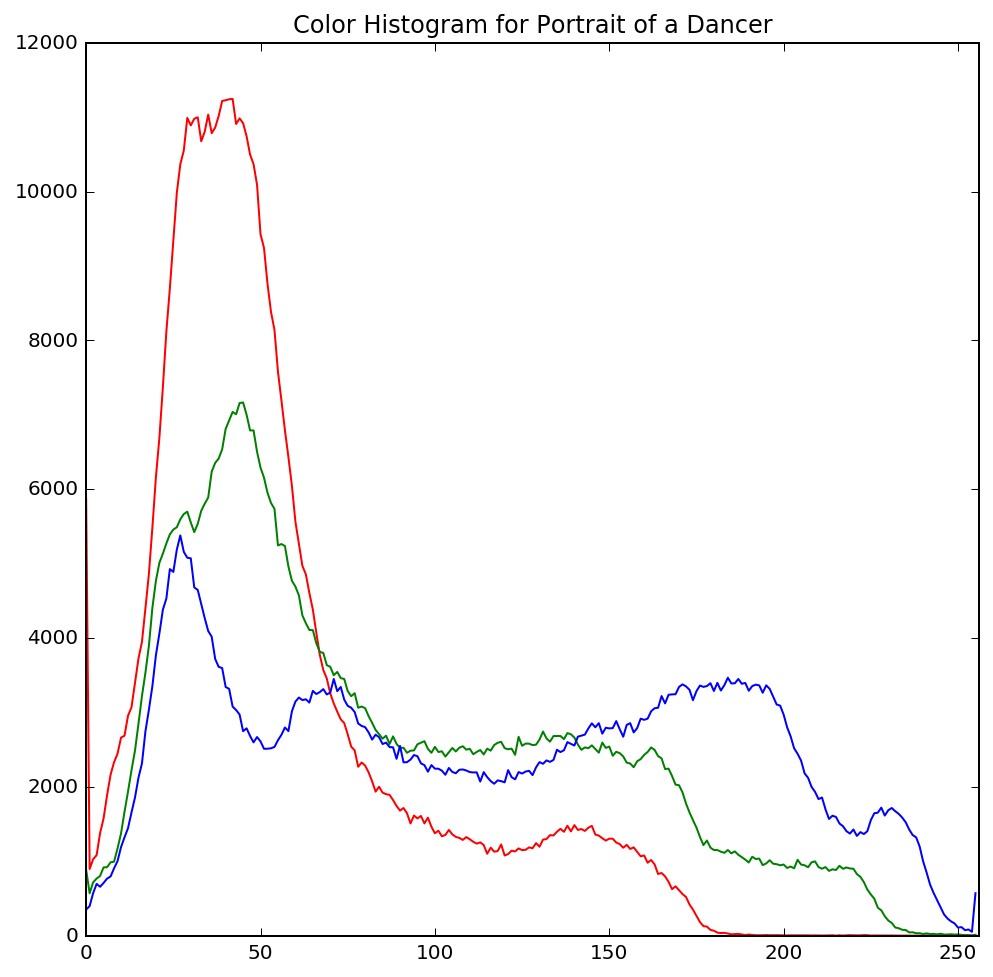

In [13]:
sluyther = '/Users/sebozek/Desktop/Better_Data/Hold_Out/Not Monet/11012.jpg'
sluyther_img = 'Portrait of a Dancer'
rgb_hist(sluyther, sluyther_img)

Also important to see how the model classifies Monet paintings to see if there is anything of broad interest in how the neural network is determining Monet paintings. 

In [77]:
monets = preds.loc[250:]
monets.columns = ['Monet_Probability']

monet.columns = ["img_name", "width", "x", 'height', 'bits', 'format', 'N/P', 'pixels', 'test']
monets = zip(monet['img_name'], monets['Monet_Probability'])

monet_probs = pd.DataFrame(monets, columns=['title', 'monet_probability'])

print monet_probs[monet_probs['monet_probability'] == monet_probs['monet_probability'].max()]
print monet_probs[monet_probs['monet_probability'] == monet_probs['monet_probability'].min()]

                                        title  monet_probability
31  Monet_Farmyard-in-Normandy___Selected.jpg           0.990522
                                                 title  monet_probability
126  Monet_The-Grand-Creuse-at-Pont-de-Vervy___Sele...           0.006693


The most Monet painting present in the hold out set was found to be *Farmyard in Normandy* painted by monet in 1863. A pastoral scene as he was defining his personal style. It has exhibits his traditional brush stroke manners. It has the nautral themes that are consistent with the middle phase of his work, while containing a wide color range.
<div style="text-align:center"><img src="https://snag.gy/FQJdex.jpg" height="344" width="375"></div>

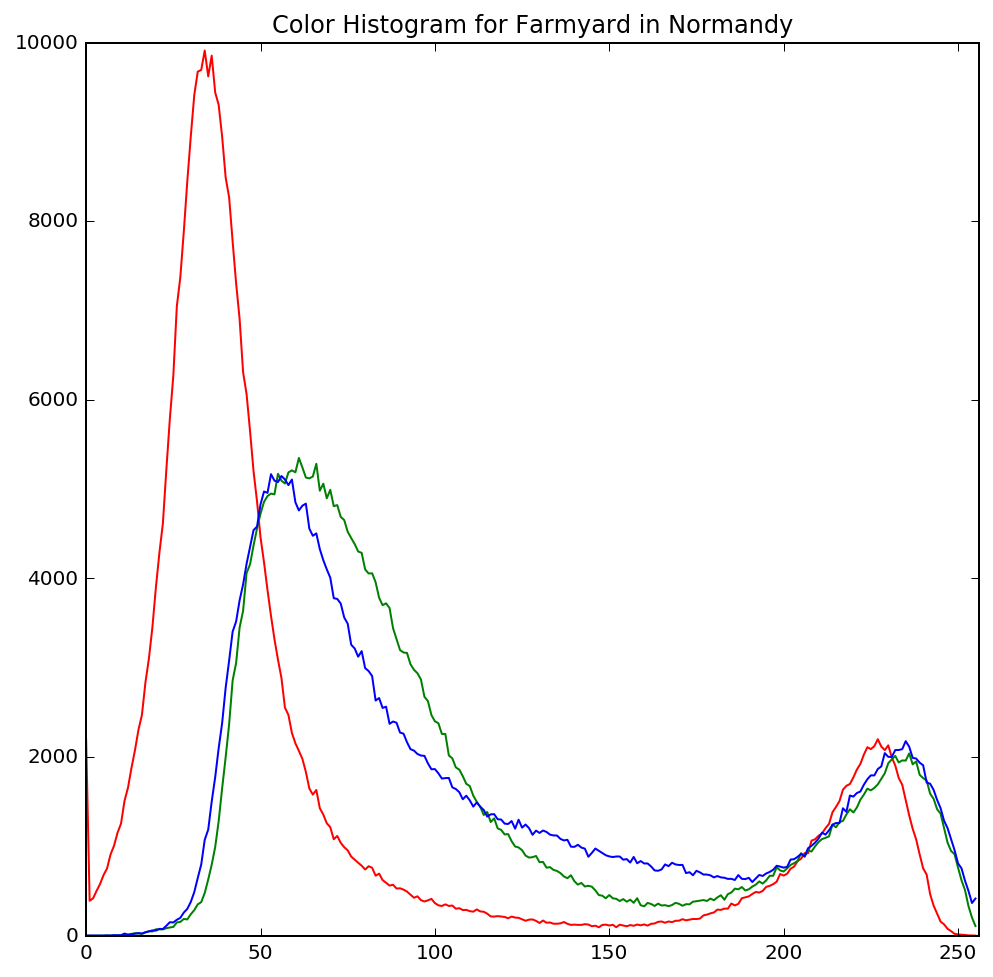

In [14]:
p_monet = '/Users/sebozek/Desktop/Better_Data/Hold_Out/Monet/Monet_Farmyard-in-Normandy___Selected.jpg'
p_monet_img = 'Farmyard in Normandy'

rgb_hist(p_monet, p_monet_img)

On the contrary the least likely to be a Monet was *The Grand Creuse at Pont de Vervy*
<div style="text-align:center"><img src="https://snag.gy/dutUpP.jpg"  height="344" width="375"></div>
Not very similar to his previous works. It looks almost abstract impressionist rather than impressionist.Brush strokes are much broader and perspectives are slightly more skewed. This was the beginning of his period of focusing on the natural landscape, and this could be considered to be a rough draft of things to come. The landscape itself is the focus, and other objects present are not as important to the painting.

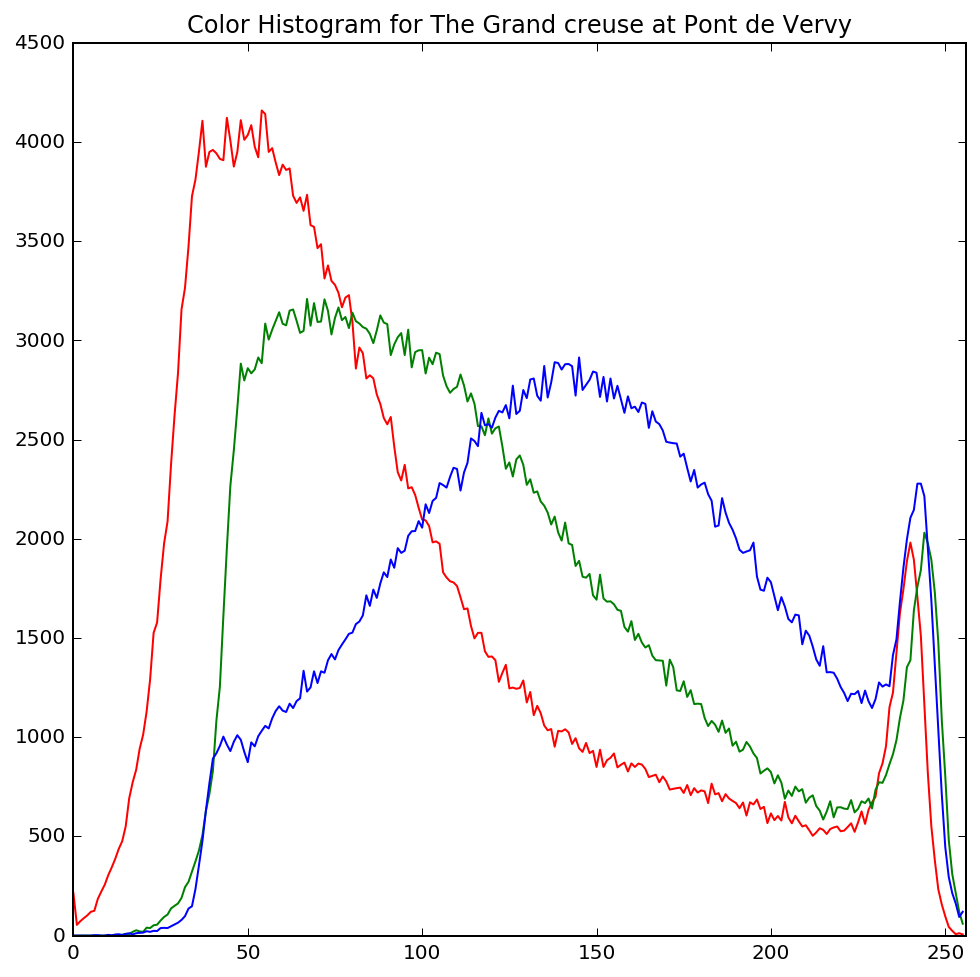

In [15]:
pn_monet = '/Users/sebozek/Desktop/Better_Data/Hold_Out/Monet/Monet_The-Grand-Creuse-at-Pont-de-Vervy___Selected.jpg'
pn_monet_img = 'The Grand creuse at Pont de Vervy'

rgb_hist(pn_monet, pn_monet_img)

# ROC Curve & Conclusion

In [164]:
preds['Class'] = [0] * 250 + [1] * 250
preds.columns = ['Prob_Monet', 'Class']

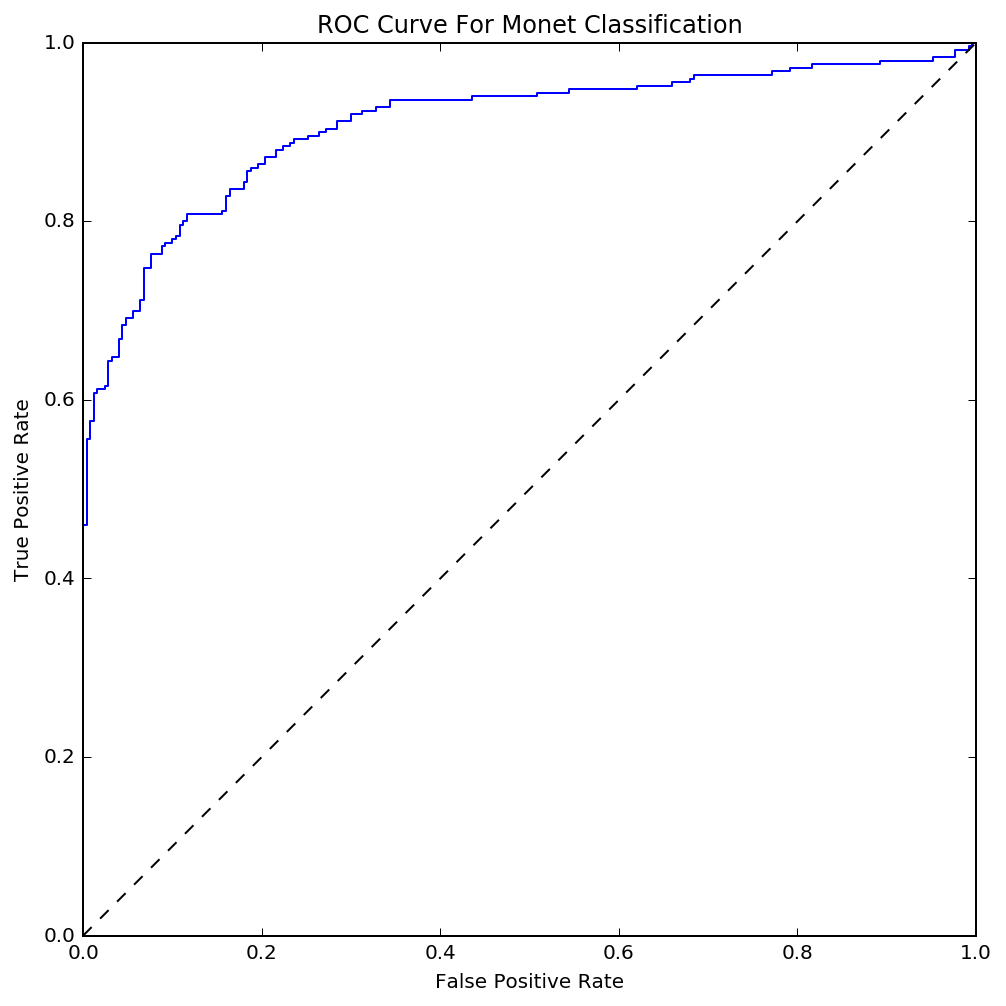

In [175]:
from sklearn.metrics import roc_curve

fpr, tpr, thres = roc_curve(preds.Class, preds.Prob_Monet)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, 'b',)
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve For Monet Classification')

plt.xlabel('False Positive Rate')
plt.xlim(0,1.0)
plt.ylabel('True Positive Rate')
plt.ylim(0,1.0)

plt.show()

From the ROC curve above, and the model accuracy graph the Monet classifier has been found to perform above the specified sucess metrics. An interesting feature of the model is it is flexible enough to be expanded to additional artists. Moving forward it will be interesting to use this model to learn the styles of other painters, and see if there are any artists that require additional tweaking in order to gain as high or higher accuracy. 

In the end the use of a neural network allowed for the creation of a model that was accurate roughly 85% of the time when it came to predicting Monet paintings. With higher resolution images and through the use of cloud computing it could be refined for even more accuracy that would allow for better determination of specific artists.

# One Last Bit

Although not an inital part of the project there was a paper published recently called [*"A Neural Algorithm of Artistic Style"*](http://arxiv.org/pdf/1508.06576.pdf) which could be used to apply an artists style to a user input image. Through the use of a convolutional neural network they were able to use it to generate the appropriate filters to apply to the base image to create a new image of the style of the input image. Through ignoring the specific pixel values the filter of the CNN can be used to create the modified images, such as the following example:
<div style="text-align:center"><img src="https://snag.gy/sWAlfb.jpg"  height="344" width="375"></div>